In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import math

In [ ]:
# from google.colab import files
# upload = files.upload()

In [ ]:
df = pd.read_csv("D:\Kuliah\Data Mining\AOL_DataMining/heart_statlog_cleveland_hungary_final.csv")
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [ ]:
df = df.drop_duplicates()

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


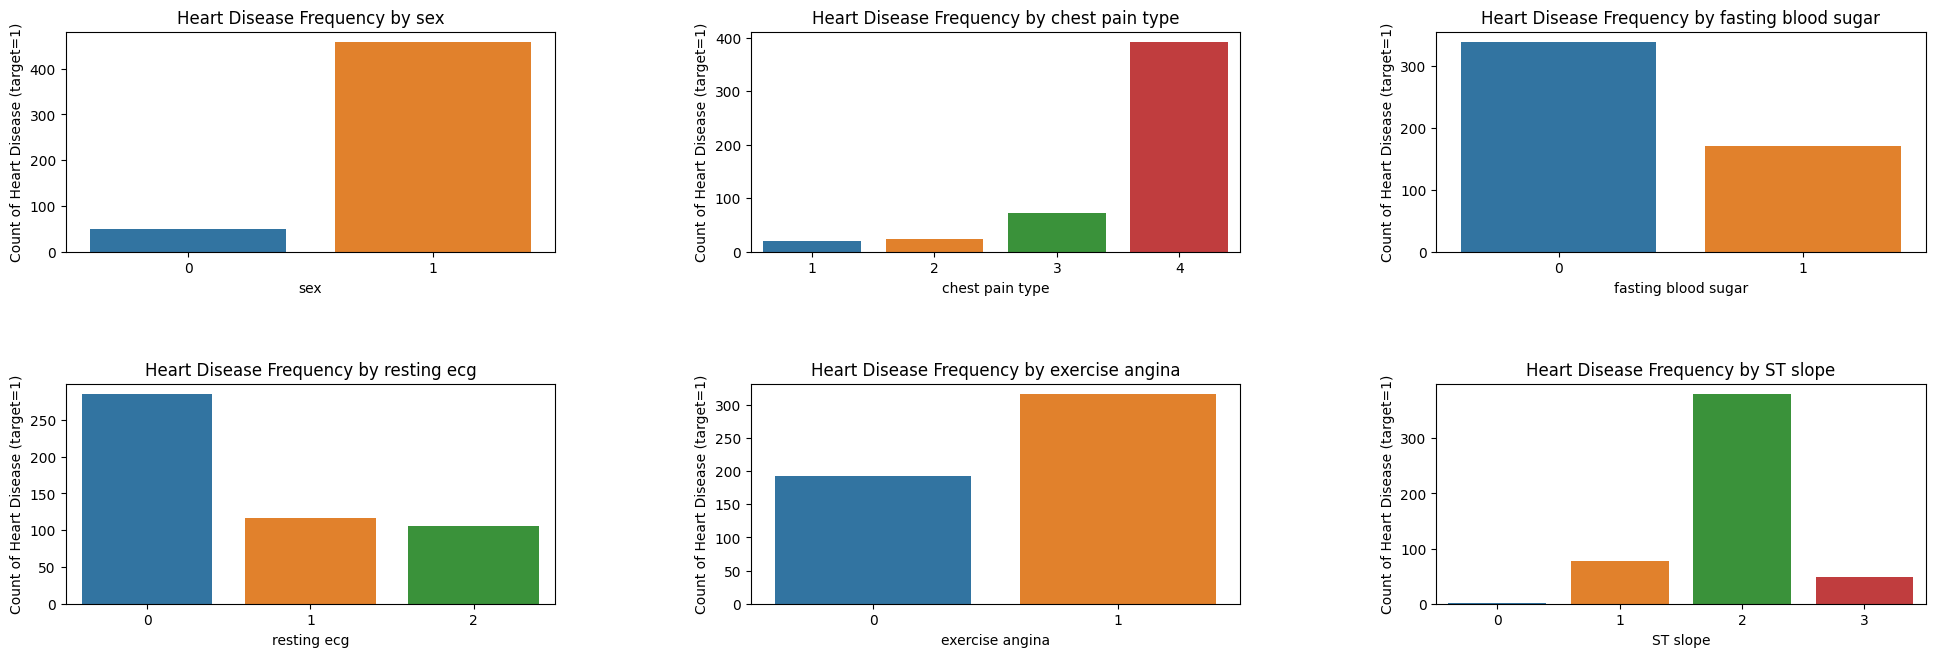

In [ ]:
categorical_cols = ['sex', 'chest pain type', 'fasting blood sugar',
                    'resting ecg', 'exercise angina', 'ST slope', 'target']

num_cols = 3
num_rows = math.ceil(len(categorical_cols) / num_cols)

fig = plt.figure(figsize=(8*num_cols, 4*num_rows))
grid = plt.GridSpec(num_rows, num_cols, wspace=0.4, hspace=0.6)

df_heart_disease = df[df['target'] == 1]

for i, col in enumerate(categorical_cols):
    if col != 'target':
        ax = fig.add_subplot(grid[i])
        sns.countplot(data=df_heart_disease, x=col, ax=ax)
        ax.set_title(f'Heart Disease Frequency by {col}')
        ax.set_ylabel('Count of Heart Disease (target=1)')
        ax.set_xlabel(col)

plt.tight_layout()
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


<function matplotlib.pyplot.show(close=None, block=None)>

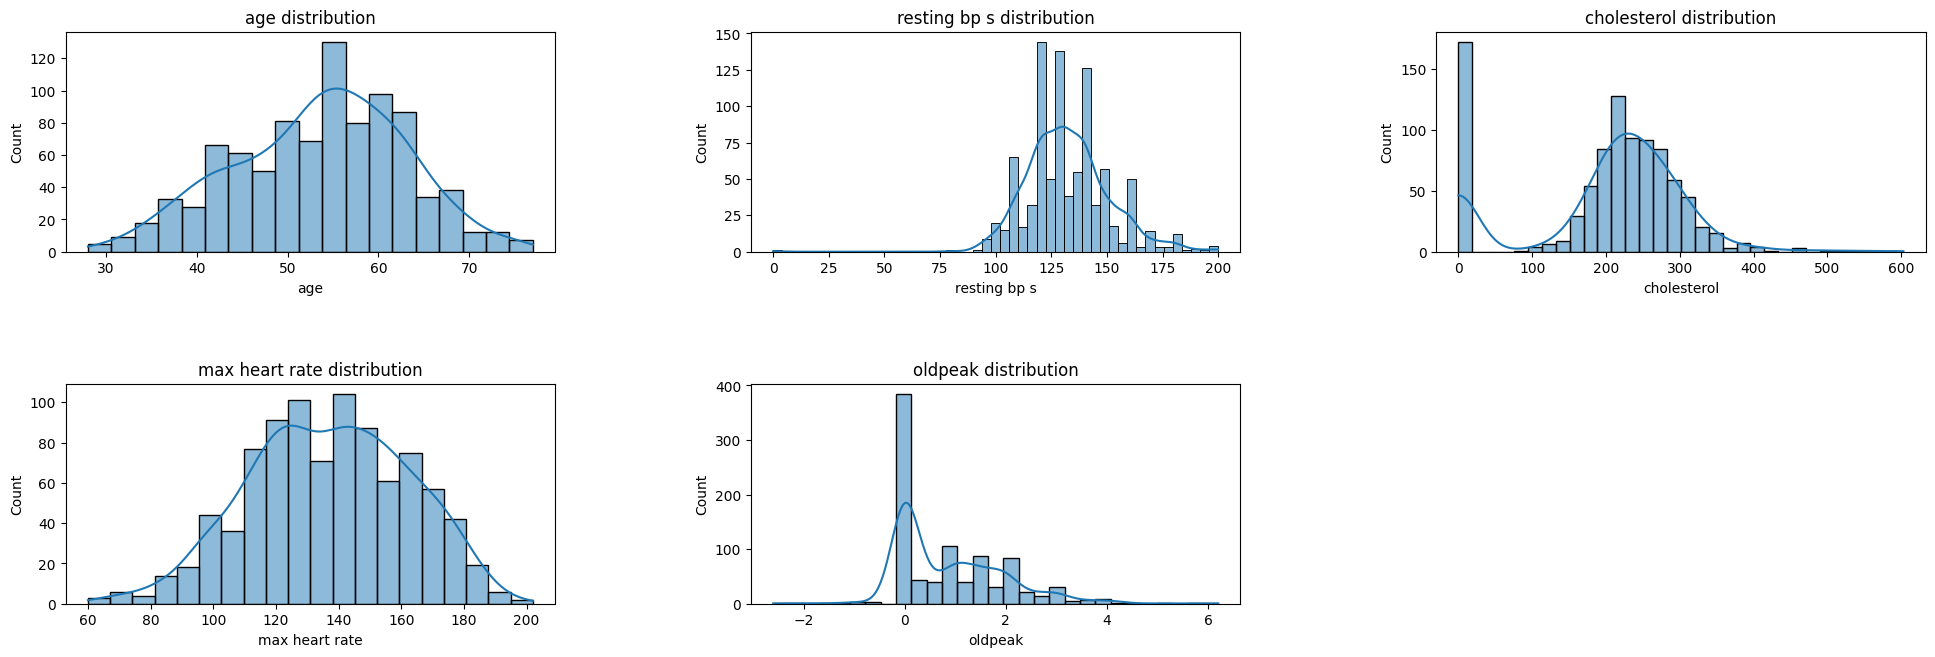

In [ ]:
num_col = ['age', 'resting bp s', 'cholesterol', 'max heart rate',
           'oldpeak']

row = 3
col = math.ceil(len(num_col)/ row)

fig = plt.figure(figsize=(8*num_cols, 4*num_rows))
grid = plt.GridSpec(num_rows, num_cols, wspace=0.4, hspace=0.6)

for i, col in enumerate(num_col):
    ax = fig.add_subplot(grid[i])
    sns.histplot(data=df, x=col, ax=ax, kde=True)
    ax.set_title(f'{col} distribution')

plt.tight_layout()
plt.show

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


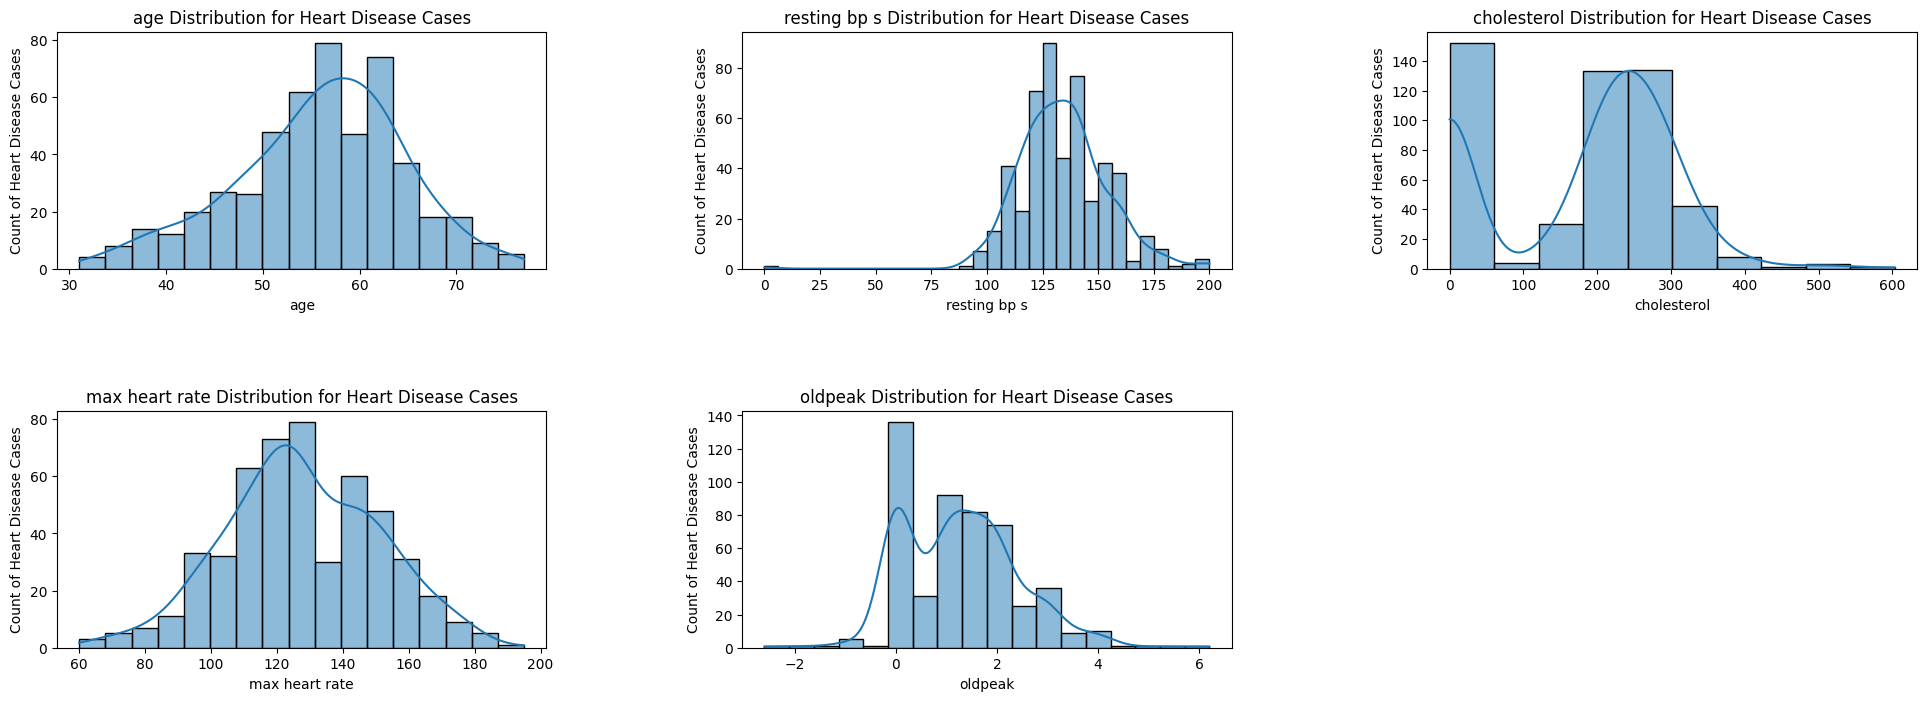

In [ ]:
num_col = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

num_cols = 3
num_rows = math.ceil(len(num_col) / num_cols)

fig = plt.figure(figsize=(8*num_cols, 4*num_rows))
grid = plt.GridSpec(num_rows, num_cols, wspace=0.4, hspace=0.6)

df_heart_disease = df[df['target'] == 1]

for i, col in enumerate(num_col):
    ax = fig.add_subplot(grid[i])
    sns.histplot(data=df_heart_disease, x=col, ax=ax, kde=True)
    ax.set_title(f'{col} Distribution for Heart Disease Cases')
    ax.set_xlabel(col)
    ax.set_ylabel('Count of Heart Disease Cases')

plt.tight_layout()
plt.show()

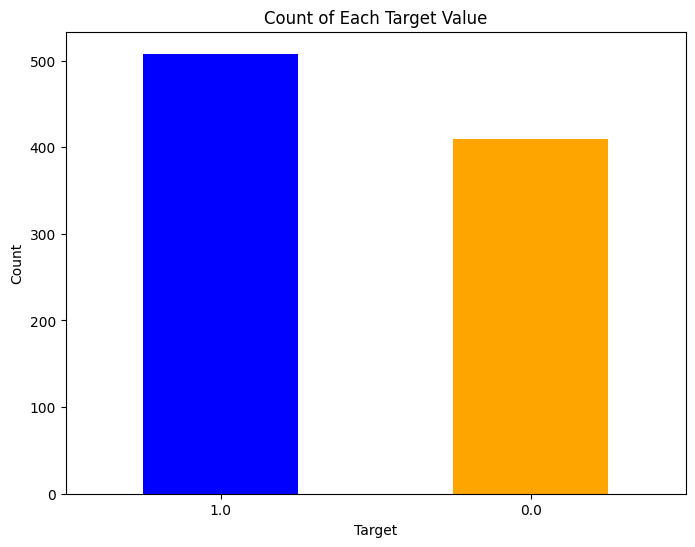

In [ ]:
class_counts = pd.Series({
    '1.0': 508,
    '0.0': 410
})

class_counts.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of Each Target Value')
plt.xticks(rotation=0)
plt.show()

In [ ]:
def replaceOutliersWithMean(df_removeMean):
    Q1 = df_removeMean.quantile(0.25)
    Q3 = df_removeMean.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_replaced = df_removeMean.copy()

    means = df_removeMean.mean()

    for col in df_removeMean.columns:
        is_outlier = (df_removeMean[col] < lower_bound[col]) | (df_removeMean[col] > upper_bound[col])
        df_replaced.loc[is_outlier, col] = means[col]

    return df_replaced

df = replaceOutliersWithMean(df)

In [ ]:
# cek imbalance data
class_counts = df['target'].value_counts()
print(class_counts)

# age_range_target_counts = df.groupby(['class_count', 'target']).size().unstack(fill_value=0)

# age_range_target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.xlabel('Age Range')
# plt.ylabel('Count')
# plt.title('Distribution of Age Range vs Target')
# plt.legend(title='Target')
# plt.show()
# plt.show()

1.0    508
0.0    410
Name: target, dtype: int64


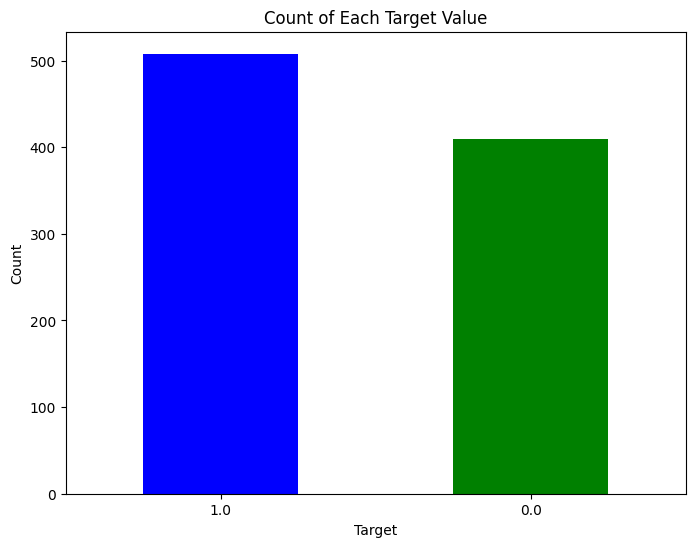

In [ ]:
class_counts = pd.Series({
    '1.0': 508,
    '0.0': 410
})

class_counts.plot(kind='bar', figsize=(8, 6), color=['blue', 'green'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of Each Target Value')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# sex_target_counts

In [ ]:
x = df.drop(columns="target")
y = df['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 1))
smote = SMOTE(random_state=42)

x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

x_resampled = scaler.fit_transform(x_resampled)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(y_resampled.value_counts())

1.0    344
0.0    344
Name: target, dtype: int64


In [ ]:
print(y_train.value_counts())

1.0    344
0.0    298
Name: target, dtype: int64


Without SMOTE

Akurasi Training 1.0
Akurasi Testing 0.7536231884057971
Confusion Matrix: 
 [[ 88  24]
 [ 44 120]]
Classification Report Testing:
               precision    recall  f1-score   support

         0.0       0.67      0.79      0.72       112
         1.0       0.83      0.73      0.78       164

    accuracy                           0.75       276
   macro avg       0.75      0.76      0.75       276
weighted avg       0.77      0.75      0.76       276



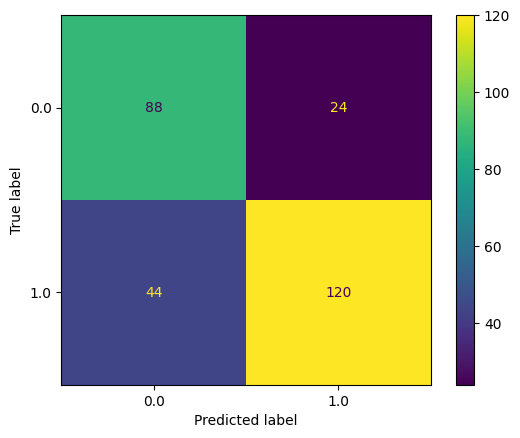

In [ ]:
# Decision Tree Without Hyperparameter Tuning (without SMOTE)

dtcWithoutSmote = DecisionTreeClassifier()

dtcWithoutSmote.fit(x_train, y_train)

y_train_pred_withoutSmote = dtcWithoutSmote.predict(x_train)
y_test_pred_withoutSmote = dtcWithoutSmote.predict(x_test)

print("Akurasi Training" , accuracy_score(y_train,y_train_pred_withoutSmote))
print("Akurasi Testing" , accuracy_score(y_test,y_test_pred_withoutSmote))

print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred_withoutSmote))

print("Classification Report Testing:\n",classification_report(y_test,y_test_pred_withoutSmote))
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred_withoutSmote)

Parameter Terbaik:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20, 'splitter': 'random'}
Akurasi Training:  0.8707165109034268
Akurasi Testing:  0.8514492753623188
Confusion Matrix:
  [[100  12]
 [ 29 135]]
Classification Report Testing:
               precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       112
         1.0       0.92      0.82      0.87       164

    accuracy                           0.85       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.85      0.85       276



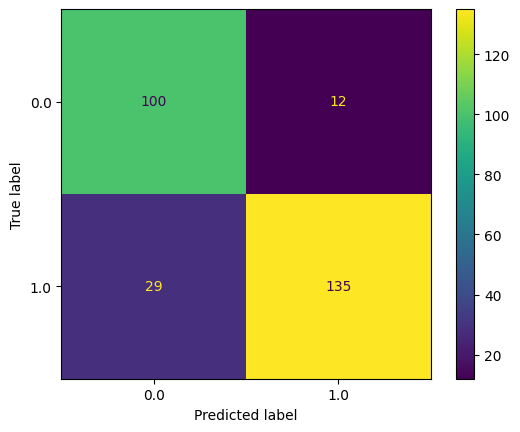

In [ ]:
# Decision Tree With Hyperparameter Tuning (without SMOTE)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
}

gsc_withoutSmote = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

gsc_withoutSmote.fit(x_train, y_train)

best_dtc_withoutSmote = gsc_withoutSmote.best_estimator_

best_dtc_withoutSmote.fit(x_train, y_train)

y_pred_best_dtc_train_withoutSmote = best_dtc_withoutSmote.predict(x_train)
y_pred_best_dtc_test_withoutSmote = best_dtc_withoutSmote.predict(x_test)

print("Parameter Terbaik: ", gsc_withoutSmote.best_params_)

print("Akurasi Training: ", accuracy_score(y_train, y_pred_best_dtc_train_withoutSmote))
print("Akurasi Testing: ", accuracy_score(y_test, y_pred_best_dtc_test_withoutSmote))
print("Confusion Matrix:\n ", confusion_matrix(y_test, y_pred_best_dtc_test_withoutSmote))
print("Classification Report Testing:\n", classification_report(y_test, y_pred_best_dtc_test_withoutSmote))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_best_dtc_test_withoutSmote)

With SMOTE

Akurasi Training 1.0
Akurasi Testing 0.7427536231884058
Confusion Matrix:
  [[ 90  22]
 [ 49 115]]
Classification Report Testing:
               precision    recall  f1-score   support

         0.0       0.65      0.80      0.72       112
         1.0       0.84      0.70      0.76       164

    accuracy                           0.74       276
   macro avg       0.74      0.75      0.74       276
weighted avg       0.76      0.74      0.75       276



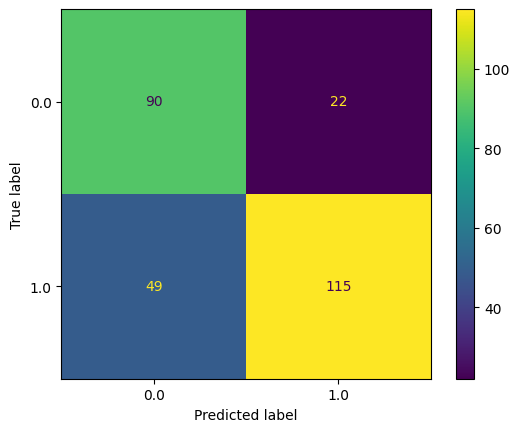

In [ ]:
# Decision Tree Without Hyperparameter Tuning

dtc = DecisionTreeClassifier()

dtc.fit(x_resampled, y_resampled)

y_train_pred = dtc.predict(x_resampled)
y_test_pred = dtc.predict(x_test)

print("Akurasi Training" , accuracy_score(y_resampled,y_train_pred))
print("Akurasi Testing" , accuracy_score(y_test,y_test_pred))

print("Confusion Matrix:\n ", confusion_matrix(y_test, y_test_pred))

print("Classification Report Testing:\n",classification_report(y_test,y_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)

Parameter Terbaik:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}
Akurasi Training:  0.872093023255814
Akurasi Testing:  0.8369565217391305
Confusion Matrix:
  [[ 95  17]
 [ 28 136]]
Classification Report Testing:
               precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       112
         1.0       0.89      0.83      0.86       164

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.83       276
weighted avg       0.84      0.84      0.84       276



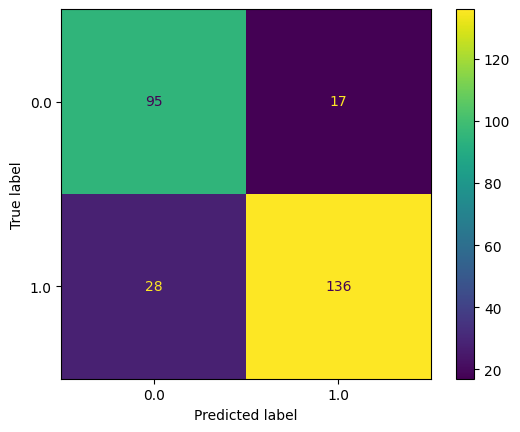

In [ ]:
# Decision Tree With Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
}

gsc = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

gsc.fit(x_resampled, y_resampled)

best_dtc = gsc.best_estimator_

best_dtc.fit(x_resampled, y_resampled)

y_pred_best_dtc_train = best_dtc.predict(x_resampled)
y_pred_best_dtc_test = best_dtc.predict(x_test)

print("Parameter Terbaik: ", gsc.best_params_)

print("Akurasi Training: ", accuracy_score(y_resampled, y_pred_best_dtc_train))
print("Akurasi Testing: ", accuracy_score(y_test, y_pred_best_dtc_test))
print("Confusion Matrix:\n ", confusion_matrix(y_test, y_pred_best_dtc_test))
print("Classification Report Testing:\n", classification_report(y_test, y_pred_best_dtc_test))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_best_dtc_test)